# Initial SubTasks

### Reading data

In [214]:
# import required libraries
import pandas as pd
import numpy as np

In [215]:
#read event and non event data
event_columns =['device_id','gender','age','group','event_id','timestamp','longitude','latitude']
non_event_columns =['device_id','gender','age','group','phone_brand','device_model']

df_event = pd.read_csv('event_data.csv', header=None, names=event_columns)
df_non_event = pd.read_csv('non_event_data.csv', header=None, names=non_event_columns)

C:\Users\chand\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [216]:
#check dataframes for sanatiy
df_event.head(2)

,device_id,gender,age,group,event_id,timestamp,longitude,latitude
0,-7548291590301750000,M,33,M32+,414,2016-05-03 00:05:31,116.79,33.98
1,-7548291590301750000,M,33,M32+,2604805,2016-05-04 03:01:32,116.79,33.98


In [217]:
df_non_event.head(2)

,device_id,gender,age,group,phone_brand,device_model
0,-7548291590301750000,M,33,M32+,Huawei,è£è€€3C
1,6943568600617760000,M,37,M32+,Xiaomi,xnote


### Cleaning data

#### Clean event data

In [218]:
df_event.dtypes

device_id     int64
gender       object
age           int64
group        object
event_id     object
timestamp    object
longitude    object
latitude     object
dtype: object

In [219]:
#replace invalid chars with a None
df_event = df_event.replace({"\\N": None})

In [220]:
# correct data types
df_event.timestamp = pd.to_datetime(df_event.timestamp)
df_event.event_id = pd.to_numeric(df_event.event_id, errors='coerce')
df_event.longitude = pd.to_numeric(df_event.longitude, errors='coerce')
df_event.latitude  = pd.to_numeric(df_event.latitude, errors='coerce')

In [221]:
df_event.dtypes
#df_event.latitude

device_id             int64
gender               object
age                   int64
group                object
event_id            float64
timestamp    datetime64[ns]
longitude           float64
latitude            float64
dtype: object

#### Clean non event data


In [223]:
df_non_event.count()

device_id       74840
gender          74840
age             74840
group           74840
phone_brand     74840
device_model    74840
dtype: int64

In [224]:
df_non_event.dtypes

device_id        int64
gender          object
age              int64
group           object
phone_brand     object
device_model    object
dtype: object

In [225]:
df_non_event.isnull().sum()

device_id       0
gender          0
age             0
group           0
phone_brand     0
device_model    0
dtype: int64

Looking at the counts and dtata types non event dataset we need not to do any cleanin on this dataset

##  EDA and Visualisations

### 1.Plot appropriate graphs representing the distribution of age and gender in the data set [univariate].

In [227]:
# import visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

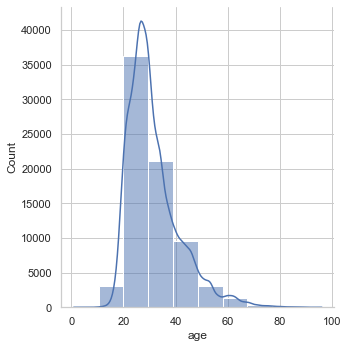

In [242]:
#plot the graph from non_event_data dataset
sns.displot(df_non_event.age, kde=True, bins = 10)
plt.show()

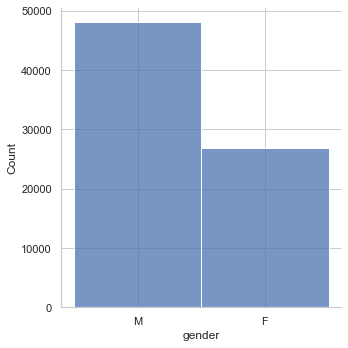

In [241]:
sns.set_theme(style="whitegrid")
sns.displot(df_non_event.gender)
plt.show()
#df_non_event.gender

In [244]:
#df_non_event.age.describe()